## 0. Setup

In [1]:
# Import dependencies
import torch
import torch.nn as nn
from plot_lib import set_default, show_scatterplot, plot_bases, plot_data
from matplotlib import pyplot as plt
from matplotlib.pyplot import plot, title, axis

In [2]:
# Set up your device 
cuda = torch.cuda.is_available()
device = torch.device("cuda:0" if cuda else "cpu")

In [3]:
# Set up random seed to 1008. Do not change the random seed.
seed = 1008
torch.manual_seed(seed)
if cuda:
    torch.cuda.manual_seed_all(seed)

## 1. Data generation
#### You'll be creating data points that are generated from a particular function.

### 1.1 Quadratic: $y = f(x) = x^2$

In [4]:
# Implement the function below
def quadratic_data_generator(n_samples):
    """
    Generate: 
    1) tensor x of size (n_samples, 1) 
    with values uniformly distributed in the interval (-1, 1] 
    using torch.rand()
    2) tensor y of size (n_samples, 1) 
    equal to x^2 using torch.pow() 
    
    The function should return: x, y
    """
    x = torch.rand(n_samples,1) * (-2) + 1
    y = torch.pow(x,2)
    return x.to(device), y.to(device)

In [5]:
# Generate the data with n_samples = 128
x_quadr, y_quadr = quadratic_data_generator(128)

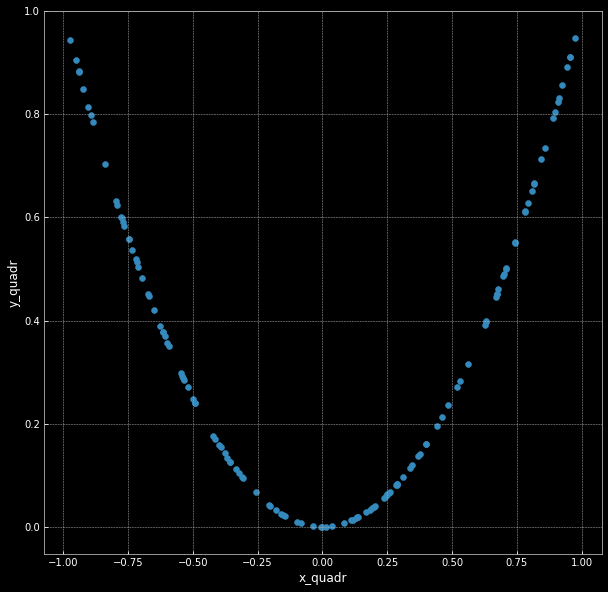

In [6]:
# Visualize the data
# TODO
set_default()
plt.scatter(x_quadr, y_quadr)
plt.xlabel('x_quadr')
plt.ylabel('y_quadr')
plt.show()

### 1.2 Cubic: $y = f(x) = x^3 - 0.5x$

In [7]:
# Implement the function below
def cubic_data_generator(n_samples):
    """
    Generate: 
    1) tensor x of size (n_samples, 1) 
    with values uniformly distributed in the interval (-1, 1] 
    using torch.rand()
    2) tensor y of size (n_samples, 1) 
    equal to (x^3 - 0.5x) using torch.pow() and torch.mul() 
    
    The function should return: x, y
    """
    x = torch.rand(n_samples,1) * (-2) + 1
    y = torch.pow(x,3) - (x * 0.5)
    return x.to(device), y.to(device)

In [8]:
# Generate the data with n_samples = 128
x_cubic, y_cubic = cubic_data_generator(128)

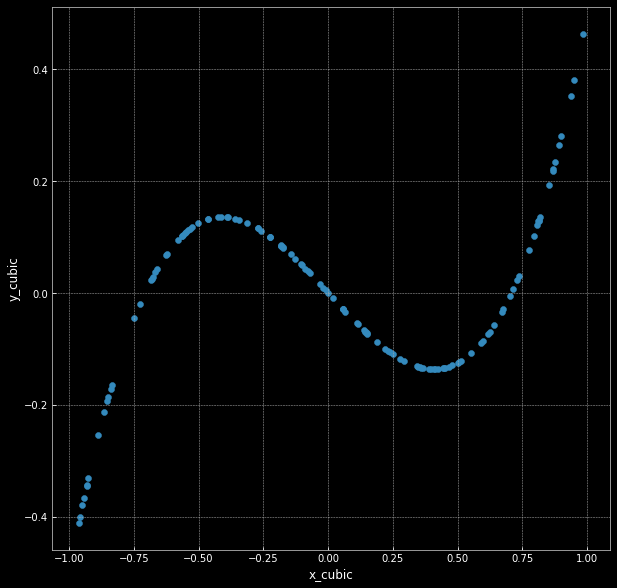

In [9]:
# Visualize the data 
# TODO
plt.scatter(x_cubic, y_cubic)
plt.xlabel('x_cubic')
plt.ylabel('y_cubic')
plt.show()

### 1.3 Sine: $y = f(x) = \sin(2.5x)$

In [10]:
# Implement the function below
def sine_data_generator(n_samples):
    """
    Generate: 
    1) tensor x of size (n_samples, 1) 
    with values uniformly distributed in the interval (-1, 1] 
    using torch.rand()
    2) tensor y of size (n_samples, 1) 
    equal to sin(2.5 * x) using torch.sin() 
    
    The function should return: x, y
    """
    x = torch.rand(n_samples,1) * (-2) + 1
    y = torch.sin(2.5*x)
    return x.to(device), y.to(device)

In [11]:
# Generate the data with n_samples = 128
x_sine, y_sine = sine_data_generator(128)

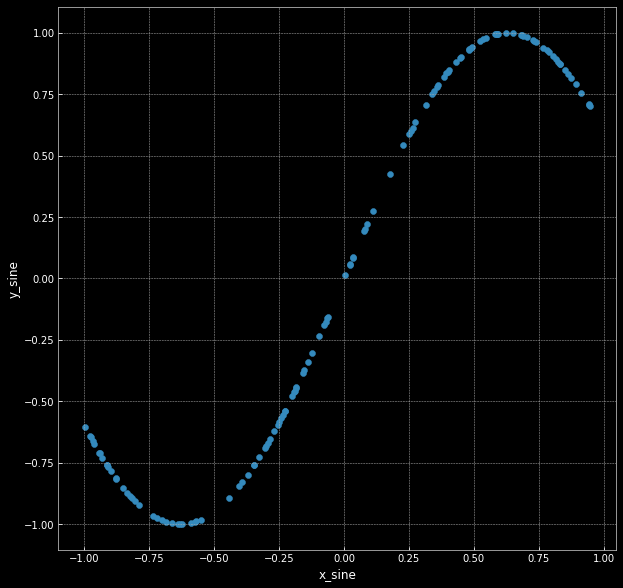

In [12]:
# Visualize the data 
# TODO
plt.scatter(x_sine, y_sine)
plt.xlabel('x_sine')
plt.ylabel('y_sine')
plt.show()

### 1.4 Absolute value: $y = f(x) = |x|$

In [13]:
# Implement the function below
def abs_data_generator(n_samples):
    """
    Generate: 
    1) tensor x of size (n_samples, 1) 
    with values uniformly distributed in the interval (-1, 1] 
    using torch.rand()
    2) tensor y of size (n_samples, 1) 
    equal to |x| using torch.abs() 
    
    The function should return: x, y
    """
    x = torch.rand(n_samples,1) * (-2) + 1
    y = torch.abs(x)
    return x.to(device), y.to(device)

In [14]:
# Generate the data with n_samples = 128
x_abs, y_abs = abs_data_generator(128)

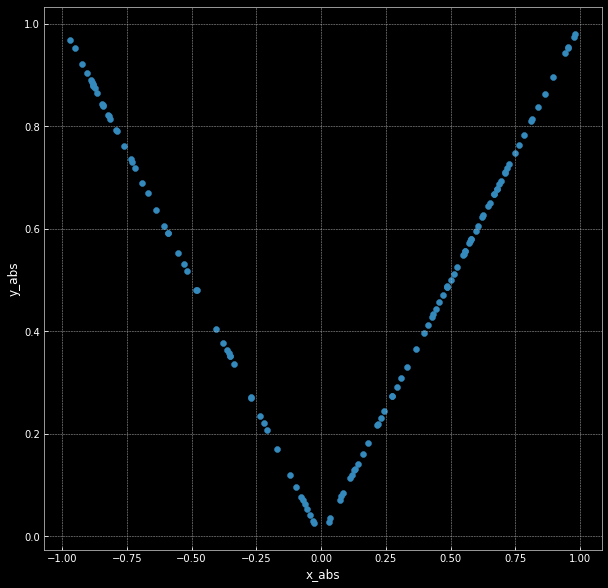

In [15]:
# Visualize the data 
# TODO
plt.scatter(x_abs, y_abs)
plt.xlabel('x_abs')
plt.ylabel('y_abs')
plt.show()

### 1.5 Heavyside Step Function: $y = f(x) = \begin{cases} 0, & x < 0 \\ 1, & x \geq 0 \end{cases}$

In [16]:
# Implement the function below
def hs_data_generator(n_samples):
    """
    Generate: 
    1) tensor x of size (n_samples, 1) 
    with values uniformly distributed in the interval (-1, 1] 
    using torch.rand()
    2) tensor y of size (n_samples, 1) 
    equal to the Heavyside Step Function using a condition.
    Make sure that y is a torch.FloatTensor.
    
    The function should return: x, y
    """
    x = torch.rand(n_samples,1) * (-2) + 1
#     y = 1 if x>= 0 else 0
    y= torch.ceil(x)
#     y = torch.ge(x,0)
    return x.to(device), y.to(device)

In [17]:
# Generate the data with n_samples = 128
x_hs, y_hs = hs_data_generator(128)

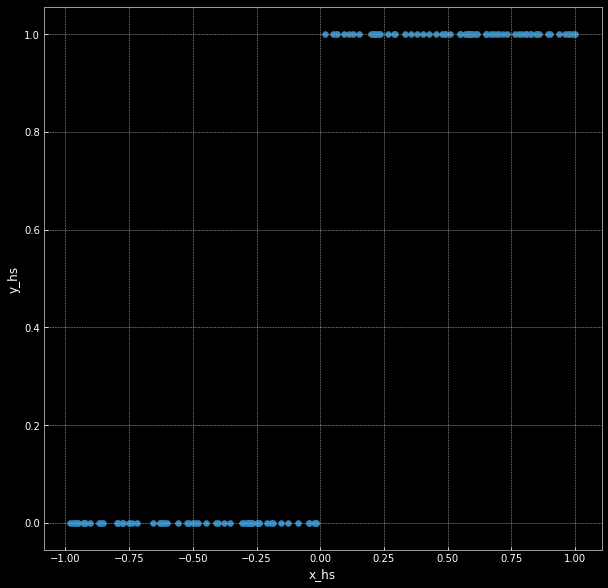

In [18]:
# Visualize the data 
# TODO
plt.scatter(x_hs, y_hs)
plt.xlabel('x_hs')
plt.ylabel('y_hs')
plt.show()

## 2. Models
#### You are going to approximate the functions above with fully connected models of different depths.  

### 2.1. Dimensionality
The models you define below will be predicting $y$ from $x$ and will use the data generated in Part 1 as training data. Fill in the input and output dimensions for each of the models.

Hint: These dimensions are independent from the number of samples. 

In [19]:
input_dim = 1
output_dim = 1

### 2.2. No Hidden 
Define a model with a single linear module `torch.nn.Linear(input_dim, output_dim)` and no non-linearity.

In [20]:
class Linear_0H(nn.Module):
    def __init__(self):
        super(Linear_0H, self).__init__()
        self.model = nn.Linear(input_dim, output_dim)

    def forward(self, x):
        x = x.view(-1, input_dim)
        return self.model(x)

### 2.2. One Hidden 
Define a model with a single hidden layer of size 3 and one ReLU non-linearity.
Use `nn.Sequential()` for defining the layers.

Hint: Architecture should be `nn.Linear(intput_dim, 3)` -> `nn.ReLU()` -> `nn.Linear(3, output_dim)`

In [21]:
class Linear_1H(nn.Module):
    def __init__(self):
        super(Linear_1H, self).__init__()
        self.model = nn.Sequential(
                nn.Linear(input_dim, 3),
                nn.ReLU(),
                nn.Linear(3,output_dim))

    def forward(self, x):
        x = x.view(-1, input_dim)
        return self.model(x)

### 2.3. Two Hidden 
Define a model with a two hidden layers of size 3 and two ReLU non-linearities.
Use `nn.Sequential()` for defining the layers.

Hint: Architecture should be `nn.Linear(input_dim,3)` -> `nn.ReLU()` -> `nn.Linear(3,3)` -> `nn.ReLU()` -> `nn.Linear(3, output_dim)`

In [22]:
class Linear_2H(nn.Module):
    def __init__(self):
        super(Linear_2H, self).__init__()
        self.model = nn.Sequential(
                nn.Linear(input_dim, 3),
                nn.ReLU(),
                nn.Linear(3,3),
                nn.ReLU(),
                nn.Linear(3, output_dim))

    def forward(self, x):
        x = x.view(-1, input_dim)
        return self.model(x)

## 3. Training

### 3.1 Train method
You are going to implement a training method which takes a model, number of epochs, training data, and threshold for loss functions as input and returns the (detached) predicitons from the last epoch. 

Make sure you understand what the method is doing and how early stopping works in this case.

In [23]:
# Training function
def train(model, epochs, x, y, loss_threshold=1e-2):
    # Set model to training mode
    model.train()
    
    # Define Mean Squared Error as loss function using nn.MSELoss()
    critereon = nn.MSELoss()
    
    # Define the SGD optimizer with learning rate of 0.01 using torch.optim.SGD()
    optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)
    
    # Training loop
    for epoch in range(epochs):
        # Forward data through model 
        y_pred = model(x)
        
        # Compute the loss 
        loss = critereon(y_pred,y)
        
        # Zero-out the optimizer 
        optimizer.zero_grad()
        
        # Backpropagate loss
        loss.backward()
        
        # Make a step with the optimizer
        optimizer.step()
        
        # Uncomment lines below once you implement the code above
        # Print out loss every 100 epochs 
        if epoch == 0 or (epoch+1) % 100 == 0:
            print('Epoch {} loss: {}'.format(epoch+1, loss.item()))
        
        # Uncomment lines below once you implement the code above
        # Early stopping based on training loss
        if loss.item() < loss_threshold:
            print('Epoch {} loss: {}'.format(epoch+1, loss.item()))
            break    
        
#         pass # remove once implemented
    
    # Return predictions from the last epoch.
    # Uncomment line below once you implement
    return y_pred.detach()

### 3.2. `Linear_0H`

In [24]:
# Define model
model_0H = Linear_0H().to(device)

In [25]:
# Train model on quadratic data for 10000 epochs and loss_threshold 1e-2
y_pred = train(model_0H, epochs=10000, x=x_quadr, y=y_quadr, loss_threshold=1e-2)

Epoch 1 loss: 1.2468349933624268
Epoch 100 loss: 0.1735665202140808
Epoch 200 loss: 0.10184863954782486
Epoch 300 loss: 0.0878414735198021
Epoch 400 loss: 0.08447939157485962
Epoch 500 loss: 0.0836586207151413
Epoch 600 loss: 0.08345799148082733
Epoch 700 loss: 0.08340895175933838
Epoch 800 loss: 0.08339696377515793
Epoch 900 loss: 0.08339402824640274
Epoch 1000 loss: 0.08339331299066544
Epoch 1100 loss: 0.0833931416273117
Epoch 1200 loss: 0.08339309692382812
Epoch 1300 loss: 0.08339308947324753
Epoch 1400 loss: 0.08339308947324753
Epoch 1500 loss: 0.08339308947324753
Epoch 1600 loss: 0.08339308202266693
Epoch 1700 loss: 0.08339308947324753
Epoch 1800 loss: 0.08339308202266693
Epoch 1900 loss: 0.08339308202266693
Epoch 2000 loss: 0.08339308202266693
Epoch 2100 loss: 0.08339308947324753
Epoch 2200 loss: 0.08339308202266693
Epoch 2300 loss: 0.08339308202266693
Epoch 2400 loss: 0.08339308202266693
Epoch 2500 loss: 0.08339308202266693
Epoch 2600 loss: 0.08339308202266693
Epoch 2700 loss: 0

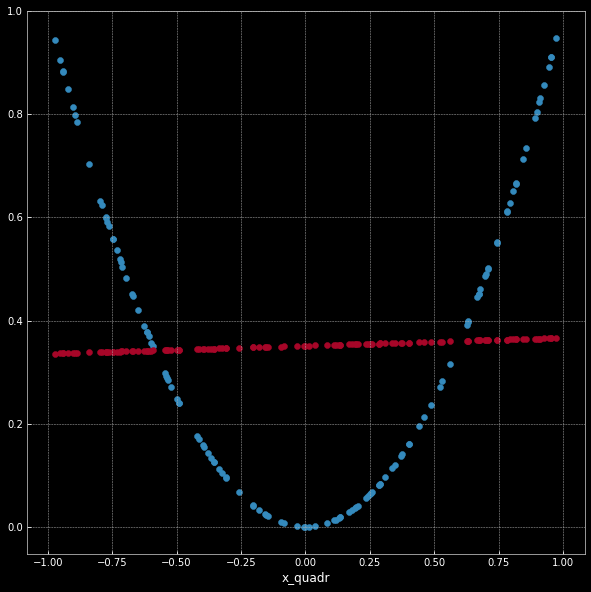

In [26]:
# Plot predictions vs actual data
plt.scatter(x_quadr, y_quadr)
plt.scatter(x_quadr, y_pred)
plt.xlabel('x_quadr')
plt.show()

In [27]:
# Define model
model_0H = Linear_0H().to(device)

In [28]:
# Train model on cubic data for 10000 epochs and loss_threshold=1e-2
y_pred = train(model_0H, epochs=10000, x=x_cubic, y=y_cubic, loss_threshold=1e-2)

Epoch 1 loss: 0.336534321308136
Epoch 100 loss: 0.08360914140939713
Epoch 200 loss: 0.03811463713645935
Epoch 300 loss: 0.025858916342258453
Epoch 400 loss: 0.02243690751492977
Epoch 500 loss: 0.021479226648807526
Epoch 600 loss: 0.021211175248026848
Epoch 700 loss: 0.021136146038770676
Epoch 800 loss: 0.021115146577358246
Epoch 900 loss: 0.021109266206622124
Epoch 1000 loss: 0.021107621490955353
Epoch 1100 loss: 0.021107159554958344
Epoch 1200 loss: 0.021107031032443047
Epoch 1300 loss: 0.02110699564218521
Epoch 1400 loss: 0.021106984466314316
Epoch 1500 loss: 0.021106984466314316
Epoch 1600 loss: 0.021106980741024017
Epoch 1700 loss: 0.021106982603669167
Epoch 1800 loss: 0.021106980741024017
Epoch 1900 loss: 0.021106980741024017
Epoch 2000 loss: 0.021106980741024017
Epoch 2100 loss: 0.021106980741024017
Epoch 2200 loss: 0.021106980741024017
Epoch 2300 loss: 0.021106980741024017
Epoch 2400 loss: 0.021106980741024017
Epoch 2500 loss: 0.021106980741024017
Epoch 2600 loss: 0.021106980741

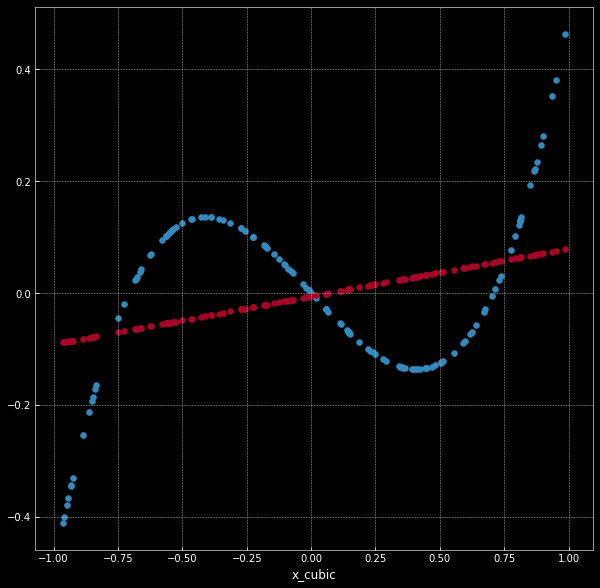

In [29]:
# Plot predictions vs actual data
plt.scatter(x_cubic, y_cubic)
plt.scatter(x_cubic, y_pred)
plt.xlabel('x_cubic')
plt.show()

In [30]:
# Define model
model_0H = Linear_0H().to(device)

In [31]:
# Train model on sine data for 10000 epochs and loss_threshold=1e-2
y_pred = train(model_0H, epochs=10000, x=x_sine, y=y_sine, loss_threshold=1e-2)

Epoch 1 loss: 0.6671090722084045
Epoch 100 loss: 0.1326790601015091
Epoch 200 loss: 0.0880281925201416
Epoch 300 loss: 0.07874548435211182
Epoch 400 loss: 0.07651439309120178
Epoch 500 loss: 0.07597192376852036
Epoch 600 loss: 0.07583992928266525
Epoch 700 loss: 0.07580780982971191
Epoch 800 loss: 0.07579999417066574
Epoch 900 loss: 0.07579808682203293
Epoch 1000 loss: 0.07579762488603592
Epoch 1100 loss: 0.07579751312732697
Epoch 1200 loss: 0.07579748332500458
Epoch 1300 loss: 0.07579748332500458
Epoch 1400 loss: 0.07579748332500458
Epoch 1500 loss: 0.07579747587442398
Epoch 1600 loss: 0.07579747587442398
Epoch 1700 loss: 0.07579747587442398
Epoch 1800 loss: 0.07579747587442398
Epoch 1900 loss: 0.07579747587442398
Epoch 2000 loss: 0.07579747587442398
Epoch 2100 loss: 0.07579747587442398
Epoch 2200 loss: 0.07579747587442398
Epoch 2300 loss: 0.07579747587442398
Epoch 2400 loss: 0.07579747587442398
Epoch 2500 loss: 0.07579747587442398
Epoch 2600 loss: 0.07579747587442398
Epoch 2700 loss:

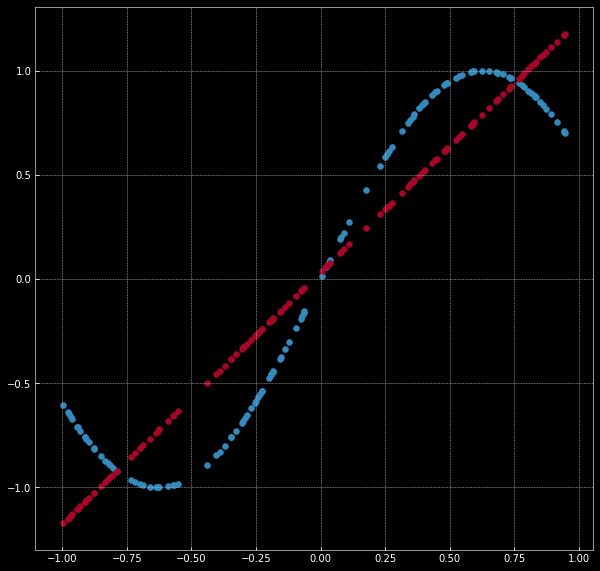

In [32]:
# Plot predictions vs actual data
plt.scatter(x_sine, y_sine)
plt.scatter(x_sine, y_pred)
plt.show()

In [33]:
# Define model
model_0H = Linear_0H().to(device)

In [34]:
# Train model on abosulte value data for 10000 epochs and loss_threshold 1e-2
y_pred = train(model_0H, epochs=10000, x=x_abs, y=y_abs, loss_threshold=1e-2)

Epoch 1 loss: 0.5330982208251953
Epoch 100 loss: 0.15037938952445984
Epoch 200 loss: 0.09508304297924042
Epoch 300 loss: 0.08208438754081726
Epoch 400 loss: 0.07886815071105957
Epoch 500 loss: 0.07806941866874695
Epoch 600 loss: 0.07787100225687027
Epoch 700 loss: 0.07782171666622162
Epoch 800 loss: 0.07780947536230087
Epoch 900 loss: 0.07780642807483673
Epoch 1000 loss: 0.07780567556619644
Epoch 1100 loss: 0.07780548930168152
Epoch 1200 loss: 0.07780543714761734
Epoch 1300 loss: 0.07780542969703674
Epoch 1400 loss: 0.07780542969703674
Epoch 1500 loss: 0.07780542969703674
Epoch 1600 loss: 0.07780542969703674
Epoch 1700 loss: 0.07780542969703674
Epoch 1800 loss: 0.07780542969703674
Epoch 1900 loss: 0.07780542969703674
Epoch 2000 loss: 0.07780542969703674
Epoch 2100 loss: 0.07780542969703674
Epoch 2200 loss: 0.07780542969703674
Epoch 2300 loss: 0.07780542969703674
Epoch 2400 loss: 0.07780542969703674
Epoch 2500 loss: 0.07780542969703674
Epoch 2600 loss: 0.07780542969703674
Epoch 2700 los

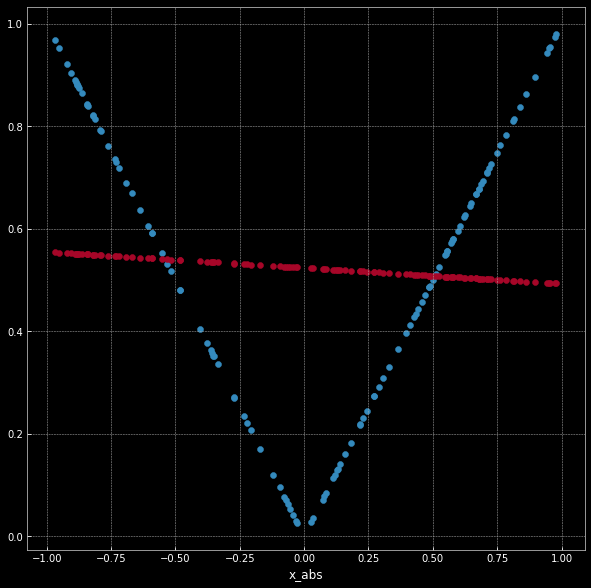

In [35]:
# Plot predictions vs actual data
plt.scatter(x_abs, y_abs)
plt.scatter(x_abs, y_pred)
plt.xlabel('x_abs')
plt.show()

In [36]:
# Define model
model_0H = Linear_0H().to(device)

In [37]:
# Train model on Heavyside Step Function data for 10000 epochs and loss_threshold 1e-2
y_pred = train(model_0H, epochs=10000, x=x_hs, y=y_hs, loss_threshold=1e-2)

Epoch 1 loss: 0.46565625071525574
Epoch 100 loss: 0.09716232866048813
Epoch 200 loss: 0.0655442550778389
Epoch 300 loss: 0.05900765210390091
Epoch 400 loss: 0.0574612133204937
Epoch 500 loss: 0.05709146335721016
Epoch 600 loss: 0.05700299143791199
Epoch 700 loss: 0.05698181688785553
Epoch 800 loss: 0.05697675049304962
Epoch 900 loss: 0.05697553604841232
Epoch 1000 loss: 0.05697524547576904
Epoch 1100 loss: 0.05697517469525337
Epoch 1200 loss: 0.05697516351938248
Epoch 1300 loss: 0.05697515606880188
Epoch 1400 loss: 0.05697515606880188
Epoch 1500 loss: 0.05697515606880188
Epoch 1600 loss: 0.05697515606880188
Epoch 1700 loss: 0.05697515606880188
Epoch 1800 loss: 0.05697515606880188
Epoch 1900 loss: 0.05697515606880188
Epoch 2000 loss: 0.05697515606880188
Epoch 2100 loss: 0.05697515606880188
Epoch 2200 loss: 0.05697515606880188
Epoch 2300 loss: 0.05697515606880188
Epoch 2400 loss: 0.05697515606880188
Epoch 2500 loss: 0.05697515606880188
Epoch 2600 loss: 0.05697515606880188
Epoch 2700 loss

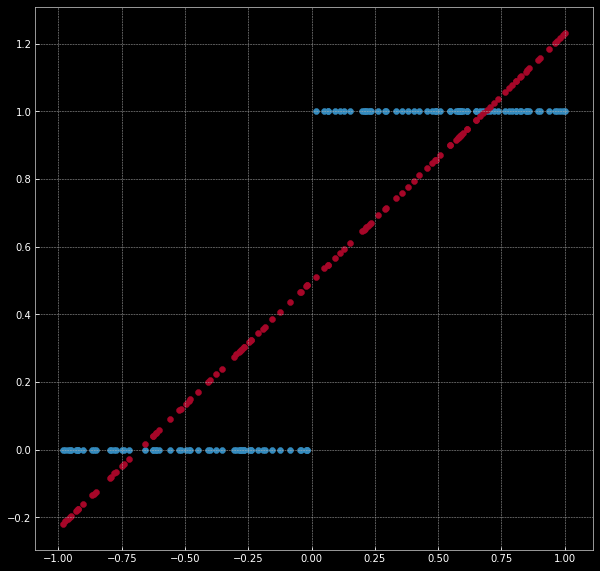

In [38]:
# Plot predictions vs actual data
plt.scatter(x_hs, y_hs)
plt.scatter(x_hs, y_pred)
plt.show()

### 3.3. `Linear_1H`

In [39]:
# Define model
model_1H = Linear_1H().to(device)

In [40]:
# Train model on quadratic data for 10000 epochs and loss threshold 1e-2
y_pred = train(model_1H, epochs=10000, x=x_quadr, y=y_quadr, loss_threshold=1e-2)

Epoch 1 loss: 0.21722716093063354
Epoch 100 loss: 0.09561772644519806
Epoch 200 loss: 0.08818674087524414
Epoch 300 loss: 0.08377274870872498
Epoch 400 loss: 0.08042798936367035
Epoch 500 loss: 0.07784710824489594
Epoch 600 loss: 0.07584434747695923
Epoch 700 loss: 0.07427991181612015
Epoch 800 loss: 0.07303918898105621
Epoch 900 loss: 0.07202691584825516
Epoch 1000 loss: 0.07116605341434479
Epoch 1100 loss: 0.07042078673839569
Epoch 1200 loss: 0.06976062059402466
Epoch 1300 loss: 0.06914941966533661
Epoch 1400 loss: 0.06855127215385437
Epoch 1500 loss: 0.06795786321163177
Epoch 1600 loss: 0.06743238866329193
Epoch 1700 loss: 0.06694994866847992
Epoch 1800 loss: 0.06648886948823929
Epoch 1900 loss: 0.06603970378637314
Epoch 2000 loss: 0.06564497947692871
Epoch 2100 loss: 0.0652691051363945
Epoch 2200 loss: 0.0648907721042633
Epoch 2300 loss: 0.06450814008712769
Epoch 2400 loss: 0.06412613391876221
Epoch 2500 loss: 0.06377411633729935
Epoch 2600 loss: 0.06342025101184845
Epoch 2700 loss

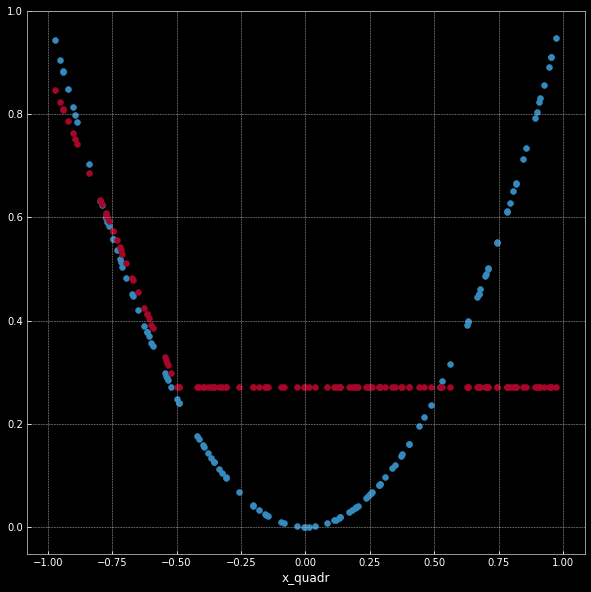

In [41]:
# Plot predictions vs actual data
plt.scatter(x_quadr, y_quadr)
plt.scatter(x_quadr, y_pred)
plt.xlabel('x_quadr')
plt.show()

In [42]:
# Define model
model_1H = Linear_1H().to(device)

In [43]:
# Train model on cubic data for 10000 epochs and loss_threshold 1e-2
y_pred = train(model_1H, epochs=10000, x=x_cubic, y=y_cubic, loss_threshold=1e-2)

Epoch 1 loss: 0.04811142385005951
Epoch 100 loss: 0.027179300785064697
Epoch 200 loss: 0.026013972237706184
Epoch 300 loss: 0.025135045871138573
Epoch 400 loss: 0.02438509836792946
Epoch 500 loss: 0.023753033950924873
Epoch 600 loss: 0.023196717724204063
Epoch 700 loss: 0.02270870842039585
Epoch 800 loss: 0.022259775549173355
Epoch 900 loss: 0.021841179579496384
Epoch 1000 loss: 0.02147619239985943
Epoch 1100 loss: 0.02114384062588215
Epoch 1200 loss: 0.020821165293455124
Epoch 1300 loss: 0.02051433175802231
Epoch 1400 loss: 0.020218119025230408
Epoch 1500 loss: 0.019932910799980164
Epoch 1600 loss: 0.01964855194091797
Epoch 1700 loss: 0.019360974431037903
Epoch 1800 loss: 0.019081270322203636
Epoch 1900 loss: 0.018807116895914078
Epoch 2000 loss: 0.018536968156695366
Epoch 2100 loss: 0.018267130479216576
Epoch 2200 loss: 0.01799803599715233
Epoch 2300 loss: 0.01772908680140972
Epoch 2400 loss: 0.017461033537983894
Epoch 2500 loss: 0.017212366685271263
Epoch 2600 loss: 0.01696669496595

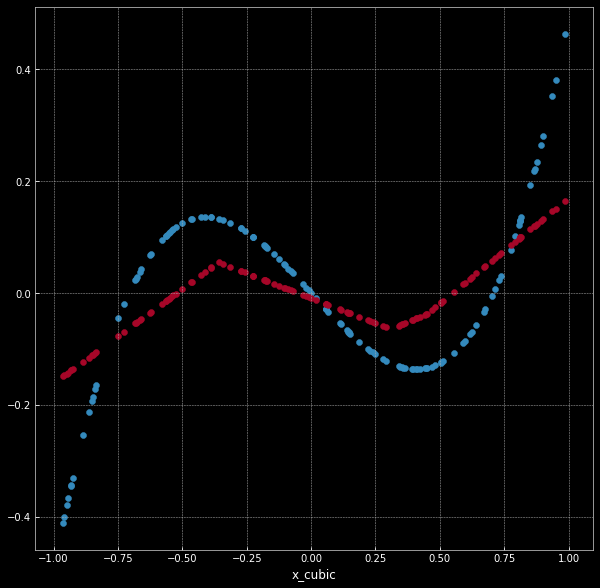

In [44]:
# Plot predictions vs actual data
plt.scatter(x_cubic, y_cubic)
plt.scatter(x_cubic, y_pred)
plt.xlabel('x_cubic')
plt.show()

In [45]:
# Define model
model_1H = Linear_1H().to(device)

In [46]:
# Train model on sine data for 10000 epochs and loss_threshold 1e-2
y_pred = train(model_1H, epochs=10000, x=x_sine, y=y_sine, loss_threshold=1e-2)

Epoch 1 loss: 0.5705702900886536
Epoch 100 loss: 0.46603924036026
Epoch 200 loss: 0.2793518900871277
Epoch 300 loss: 0.14937953650951385
Epoch 400 loss: 0.0957150012254715
Epoch 500 loss: 0.07618500292301178
Epoch 600 loss: 0.0690859705209732
Epoch 700 loss: 0.06614717841148376
Epoch 800 loss: 0.06485104560852051
Epoch 900 loss: 0.06417131423950195
Epoch 1000 loss: 0.06379973143339157
Epoch 1100 loss: 0.06365568935871124
Epoch 1200 loss: 0.06360545009374619
Epoch 1300 loss: 0.0635848417878151
Epoch 1400 loss: 0.06357568502426147
Epoch 1500 loss: 0.06357023119926453
Epoch 1600 loss: 0.06356678903102875
Epoch 1700 loss: 0.06356457620859146
Epoch 1800 loss: 0.06356313824653625
Epoch 1900 loss: 0.06356219947338104
Epoch 2000 loss: 0.06356161087751389
Epoch 2100 loss: 0.06356121599674225
Epoch 2200 loss: 0.06356096267700195
Epoch 2300 loss: 0.06356079876422882
Epoch 2400 loss: 0.06356068700551987
Epoch 2500 loss: 0.0635606199502945
Epoch 2600 loss: 0.06356057524681091
Epoch 2700 loss: 0.063

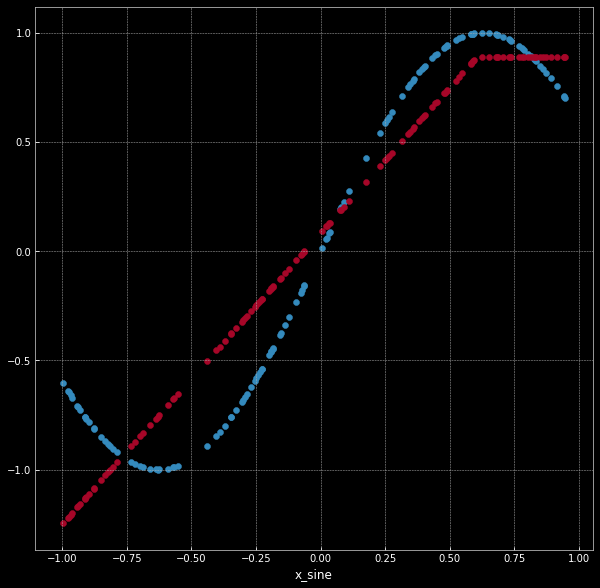

In [47]:
# Plot predictions vs actual data
plt.scatter(x_sine, y_sine)
plt.scatter(x_sine, y_pred)
plt.xlabel('x_sine')
plt.show()

In [48]:
# Define model
model_1H = Linear_1H().to(device)

In [49]:
# Train model on abosulte value data for 10000 epochs and loss_threshold 1e-2
y_pred = train(model_1H, epochs=10000, x=x_abs, y=y_abs, loss_threshold=1e-2)

Epoch 1 loss: 0.6397567987442017
Epoch 100 loss: 0.07101622223854065
Epoch 200 loss: 0.03209691494703293
Epoch 300 loss: 0.02052065171301365
Epoch 400 loss: 0.01579931005835533
Epoch 500 loss: 0.012739300727844238
Epoch 600 loss: 0.010331748053431511
Epoch 616 loss: 0.009989896789193153


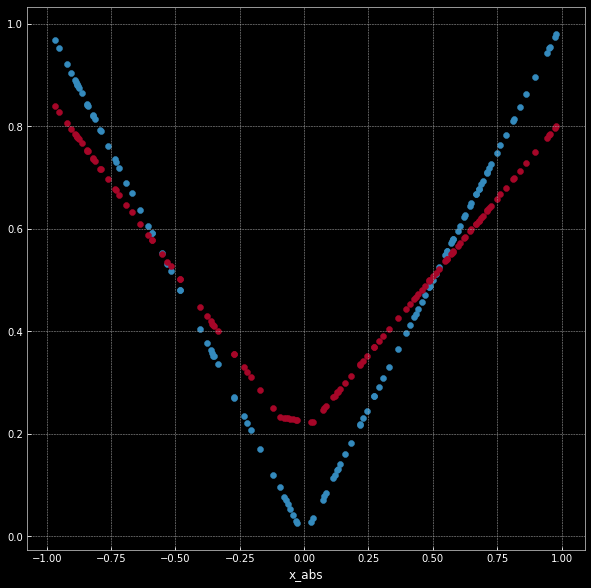

In [50]:
# Plot predictions vs actual data
plt.scatter(x_abs, y_abs)
plt.scatter(x_abs, y_pred)
plt.xlabel('x_abs')
plt.show()

In [51]:
# Define model
model_1H = Linear_1H().to(device)

In [52]:
# Train model on Heavyside Step Function data for 10000 epochs and loss_threshold 1e-2
y_pred = train(model_1H, epochs=10000, x=x_hs, y=y_hs, loss_threshold=1e-2)

Epoch 1 loss: 0.20919397473335266
Epoch 100 loss: 0.12678194046020508
Epoch 200 loss: 0.08619529008865356
Epoch 300 loss: 0.06566965579986572
Epoch 400 loss: 0.05747427046298981
Epoch 500 loss: 0.054149139672517776
Epoch 600 loss: 0.05260567367076874
Epoch 700 loss: 0.05176477134227753
Epoch 800 loss: 0.051279615610837936
Epoch 900 loss: 0.0509442575275898
Epoch 1000 loss: 0.05069398507475853
Epoch 1100 loss: 0.05045723170042038
Epoch 1200 loss: 0.0502467080950737
Epoch 1300 loss: 0.050080977380275726
Epoch 1400 loss: 0.049956098198890686
Epoch 1500 loss: 0.04986197501420975
Epoch 1600 loss: 0.049785856157541275
Epoch 1700 loss: 0.049727559089660645
Epoch 1800 loss: 0.04968363046646118
Epoch 1900 loss: 0.04965057224035263
Epoch 2000 loss: 0.049625661224126816
Epoch 2100 loss: 0.04960688576102257
Epoch 2200 loss: 0.0495915561914444
Epoch 2300 loss: 0.049579549580812454
Epoch 2400 loss: 0.049570173025131226
Epoch 2500 loss: 0.04956313222646713
Epoch 2600 loss: 0.04955784231424332
Epoch 2

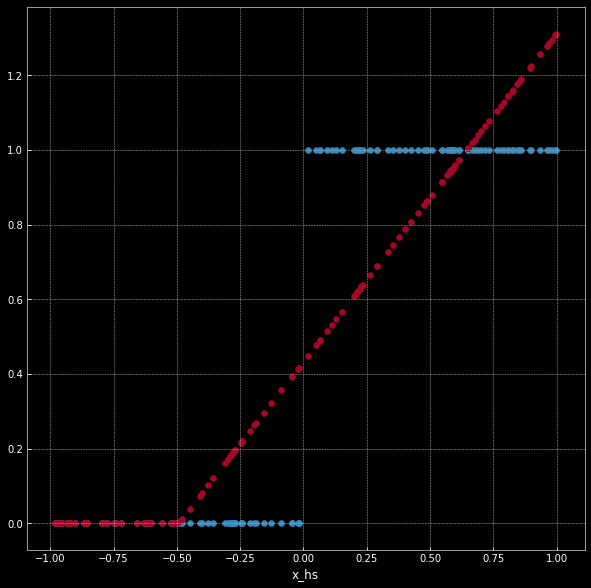

In [53]:
# Plot predictions vs actual data
plt.scatter(x_hs, y_hs)
plt.scatter(x_hs, y_pred)
plt.xlabel('x_hs')
plt.show()

### 3.3. `Linear_2H`

In [54]:
# Define model
model_2H = Linear_2H().to(device)

In [55]:
# Train model on quadratic data for 10000 epochs and loss_threshold 1e-2
y_pred = train(model_2H, epochs=10000, x=x_quadr, y=y_quadr, loss_threshold=1e-2)

Epoch 1 loss: 1.4042054414749146
Epoch 100 loss: 0.09425880759954453
Epoch 200 loss: 0.08368376642465591
Epoch 300 loss: 0.08351404964923859
Epoch 400 loss: 0.08349046111106873
Epoch 500 loss: 0.08348040282726288
Epoch 600 loss: 0.08347797393798828
Epoch 700 loss: 0.08347716182470322
Epoch 800 loss: 0.08347634971141815
Epoch 900 loss: 0.08347626030445099
Epoch 1000 loss: 0.08347626030445099
Epoch 1100 loss: 0.08347626030445099
Epoch 1200 loss: 0.08347626030445099
Epoch 1300 loss: 0.08347626030445099
Epoch 1400 loss: 0.08347626030445099
Epoch 1500 loss: 0.08347626030445099
Epoch 1600 loss: 0.08347626030445099
Epoch 1700 loss: 0.08347626030445099
Epoch 1800 loss: 0.08347626030445099
Epoch 1900 loss: 0.08347626030445099
Epoch 2000 loss: 0.08347626030445099
Epoch 2100 loss: 0.08347626030445099
Epoch 2200 loss: 0.08347626030445099
Epoch 2300 loss: 0.08347626030445099
Epoch 2400 loss: 0.08347626030445099
Epoch 2500 loss: 0.08347626030445099
Epoch 2600 loss: 0.08347626030445099
Epoch 2700 los

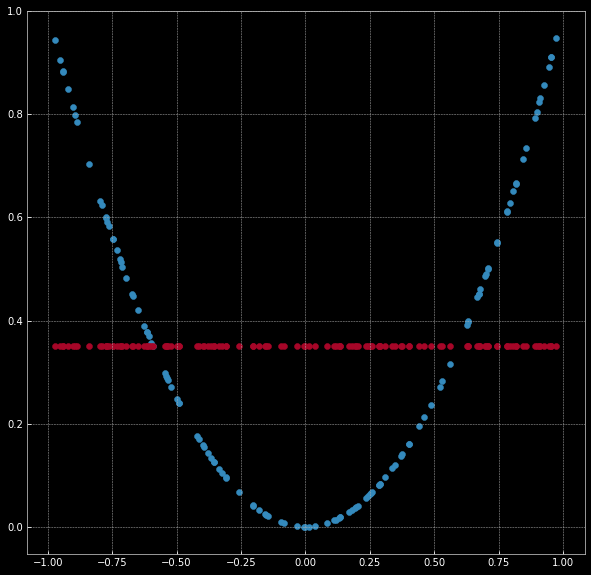

In [56]:
# Plot predictions vs actual data
plt.scatter(x_quadr, y_quadr)
plt.scatter(x_quadr, y_pred)
plt.show()

In [57]:
# Define model
model_2H = Linear_2H().to(device)

In [58]:
# Train model on cubic data for 10000 epochs and loss_threshold 1e-2
y_pred = train(model_2H, epochs=10000, x=x_cubic, y=y_cubic, loss_threshold=1e-2)

Epoch 1 loss: 0.055934835225343704
Epoch 100 loss: 0.029823042452335358
Epoch 200 loss: 0.02534036710858345
Epoch 300 loss: 0.022820988669991493
Epoch 400 loss: 0.021397806704044342
Epoch 500 loss: 0.020581763237714767
Epoch 600 loss: 0.02007521316409111
Epoch 700 loss: 0.0197267085313797
Epoch 800 loss: 0.019458318129181862
Epoch 900 loss: 0.019233986735343933
Epoch 1000 loss: 0.019032035022974014
Epoch 1100 loss: 0.018843185156583786
Epoch 1200 loss: 0.018659647554159164
Epoch 1300 loss: 0.018487051129341125
Epoch 1400 loss: 0.018318697810173035
Epoch 1500 loss: 0.018155613914132118
Epoch 1600 loss: 0.018000833690166473
Epoch 1700 loss: 0.017847925424575806
Epoch 1800 loss: 0.017697125673294067
Epoch 1900 loss: 0.017547108232975006
Epoch 2000 loss: 0.01740257628262043
Epoch 2100 loss: 0.017261821776628494
Epoch 2200 loss: 0.017120853066444397
Epoch 2300 loss: 0.01697954349219799
Epoch 2400 loss: 0.016840215772390366
Epoch 2500 loss: 0.016702743247151375
Epoch 2600 loss: 0.01657296717

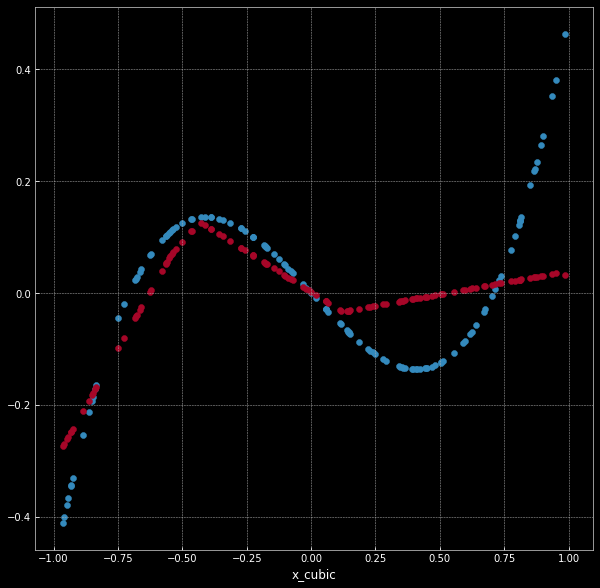

In [59]:
# Plot predictions vs actual data
plt.scatter(x_cubic, y_cubic)
plt.scatter(x_cubic, y_pred)
plt.xlabel('x_cubic')
plt.show()

In [60]:
# Define model
model_2H = Linear_2H().to(device)

In [61]:
# Train model on sine data for 10000 epochs and loss_threshold 1e-2
y_pred = train(model_2H, epochs=10000, x=x_sine, y=y_sine, loss_threshold=1e-2)

Epoch 1 loss: 0.8337273597717285
Epoch 100 loss: 0.4859643876552582
Epoch 200 loss: 0.23375800251960754
Epoch 300 loss: 0.0942215770483017
Epoch 400 loss: 0.04880456626415253
Epoch 500 loss: 0.03469519317150116
Epoch 600 loss: 0.028106456622481346
Epoch 700 loss: 0.023836206644773483
Epoch 800 loss: 0.020999791100621223
Epoch 900 loss: 0.01920563355088234
Epoch 1000 loss: 0.0179403368383646
Epoch 1100 loss: 0.01706145890057087
Epoch 1200 loss: 0.016358956694602966
Epoch 1300 loss: 0.01579083874821663
Epoch 1400 loss: 0.01530193816870451
Epoch 1500 loss: 0.014876622706651688
Epoch 1600 loss: 0.014503059908747673
Epoch 1700 loss: 0.01417098194360733
Epoch 1800 loss: 0.013871153816580772
Epoch 1900 loss: 0.01359551027417183
Epoch 2000 loss: 0.013339400291442871
Epoch 2100 loss: 0.013100160285830498
Epoch 2200 loss: 0.01287393644452095
Epoch 2300 loss: 0.012660061940550804
Epoch 2400 loss: 0.012456052005290985
Epoch 2500 loss: 0.012261513620615005
Epoch 2600 loss: 0.01207597553730011
Epoch

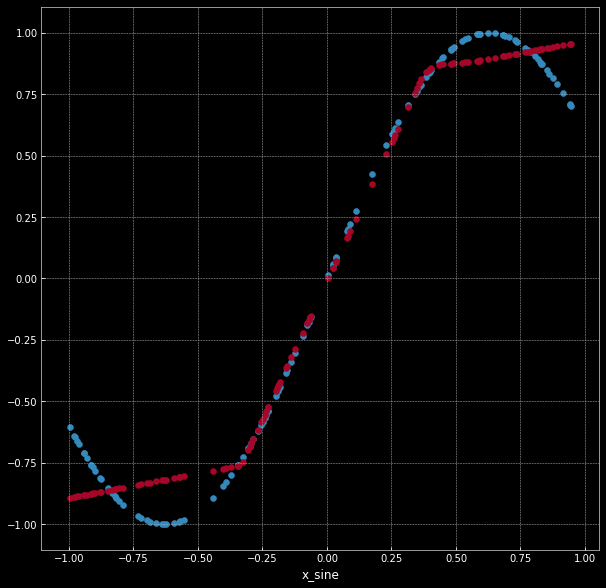

In [62]:
# Plot predictions vs actual data
plt.scatter(x_sine, y_sine)
plt.scatter(x_sine, y_pred)
plt.xlabel('x_sine')
plt.show()

In [63]:
# Define model
model_2H = Linear_2H().to(device)

In [64]:
# Train model on abosulte value data for 10000 epochs and loss_threshold=1e-2
y_pred = train(model_2H, epochs=10000, x=x_abs, y=y_abs, loss_threshold=1e-2)

Epoch 1 loss: 0.10965890437364578
Epoch 100 loss: 0.07343203574419022
Epoch 200 loss: 0.06899388879537582
Epoch 300 loss: 0.06701350957155228
Epoch 400 loss: 0.06580578535795212
Epoch 500 loss: 0.06488087028265
Epoch 600 loss: 0.06398890912532806
Epoch 700 loss: 0.06312204152345657
Epoch 800 loss: 0.06230314075946808
Epoch 900 loss: 0.061541441828012466
Epoch 1000 loss: 0.060835354030132294
Epoch 1100 loss: 0.06017438322305679
Epoch 1200 loss: 0.059573352336883545
Epoch 1300 loss: 0.05900850147008896
Epoch 1400 loss: 0.05850539728999138
Epoch 1500 loss: 0.05802116543054581
Epoch 1600 loss: 0.05754421651363373
Epoch 1700 loss: 0.05711967870593071
Epoch 1800 loss: 0.05672096088528633
Epoch 1900 loss: 0.0563310869038105
Epoch 2000 loss: 0.05599627643823624
Epoch 2100 loss: 0.055696941912174225
Epoch 2200 loss: 0.05543229356408119
Epoch 2300 loss: 0.05520852655172348
Epoch 2400 loss: 0.0550040565431118
Epoch 2500 loss: 0.05480855703353882
Epoch 2600 loss: 0.05461999028921127
Epoch 2700 los

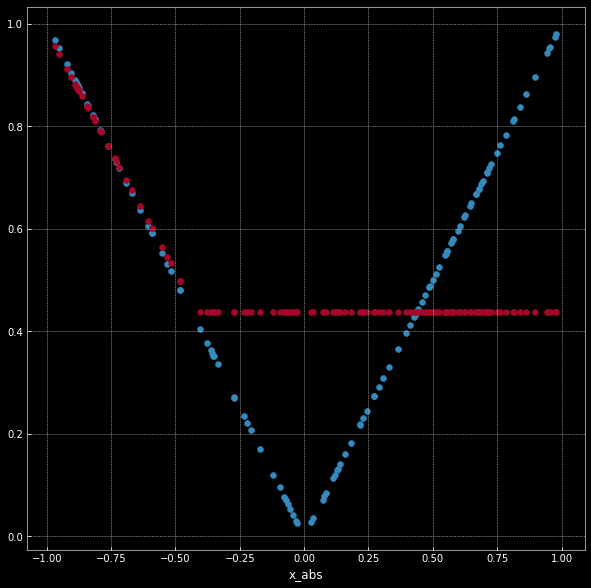

In [65]:
# Plot predictions vs actual data
plt.scatter(x_abs, y_abs)
plt.scatter(x_abs, y_pred)
plt.xlabel('x_abs')
plt.show()

In [66]:
# Define model
model_2H = Linear_2H().to(device)

In [67]:
# Train model on Heavyside Step Function data for 10000 epochs and loss_threshold 1e-2
y_pred = train(model_2H, epochs=10000, x=x_hs, y=y_hs, loss_threshold=1e-2)

Epoch 1 loss: 0.2843793034553528
Epoch 100 loss: 0.16263043880462646
Epoch 200 loss: 0.11968081444501877
Epoch 300 loss: 0.08938533067703247
Epoch 400 loss: 0.07185333967208862
Epoch 500 loss: 0.06232273578643799
Epoch 600 loss: 0.056608542799949646
Epoch 700 loss: 0.05399366468191147
Epoch 800 loss: 0.05235575884580612
Epoch 900 loss: 0.05129233002662659
Epoch 1000 loss: 0.05061151087284088
Epoch 1100 loss: 0.0502312108874321
Epoch 1200 loss: 0.050067052245140076
Epoch 1300 loss: 0.04998806118965149
Epoch 1400 loss: 0.0499381348490715
Epoch 1500 loss: 0.049900349229574203
Epoch 1600 loss: 0.04986562207341194
Epoch 1700 loss: 0.049833185970783234
Epoch 1800 loss: 0.04980317875742912
Epoch 1900 loss: 0.04977535456418991
Epoch 2000 loss: 0.049751099199056625
Epoch 2100 loss: 0.049734022468328476
Epoch 2200 loss: 0.04971785470843315
Epoch 2300 loss: 0.04970254749059677
Epoch 2400 loss: 0.04968804121017456
Epoch 2500 loss: 0.0496770441532135
Epoch 2600 loss: 0.049667902290821075
Epoch 2700

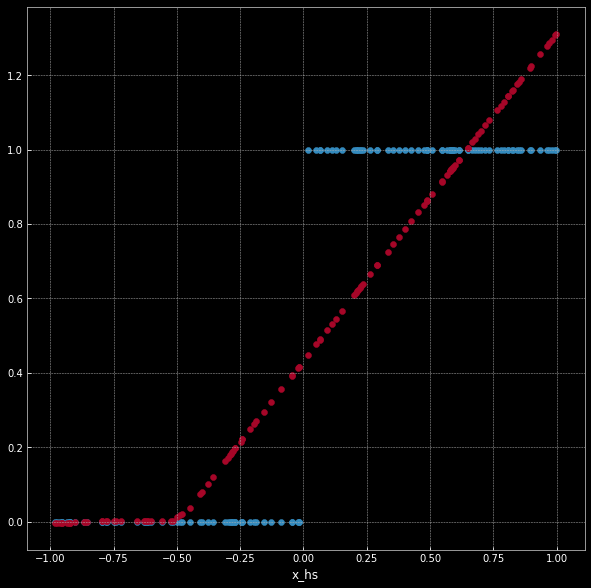

In [68]:
# Plot predictions vs actual data
plt.scatter(x_hs, y_hs)
plt.scatter(x_hs, y_pred)
plt.xlabel('x_hs')
plt.show()

### 3.4. Which of the models stopped early and on what data?
Please list the experiments where the `loss_threshold` of 1e-2 was reached early. 

List:

Linear_1H
1. Cubic
2. Absolute
 
Linear_2H
1. Cubic
2. Sine